<a href="https://colab.research.google.com/github/MfmRifath/LLM_Learning/blob/main/Pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Welcome to pipeline

The Huggingface transformers library provide APIs at two differnt levels The high level api for using open-source model for typicl infernce tsak is called "pipelines". it is incredibly easy to use.
You create a pipeline using something like:

my_pipeline= pipeline('the_task_i_want_to_do')

followed by:

result=my_pipeline('my_input')

and that's it.


In [2]:
!pip install -q transformers datasets diffusers

In [3]:
# Imports
import torch
from transformers import pipeline
from diffusers import DiffusionPipeline
from datasets import load_dataset
import soundfile as sf
from IPython.display import Audio

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In [8]:
#setimental analysis
classifier=pipeline('sentiment-analysis', device='cuda')
result=classifier('I am super excited to be on the way to LLM mastery!')
print(result)

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


[{'label': 'POSITIVE', 'score': 0.999354898929596}]


In [10]:
# Name Entity Recognition
ner = pipeline("ner", grouped_entities=True, device='cuda')
result=ner("Barck Obama was the 44th president of the United States")
print(result)

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision 4c53496 (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


[{'entity_group': 'PER', 'score': 0.99904674, 'word': 'Barck Obama', 'start': 0, 'end': 11}, {'entity_group': 'LOC', 'score': 0.9988265, 'word': 'United States', 'start': 42, 'end': 55}]


In [11]:
#Questions Answering wit context
question_answering=pipeline('question-answering', device='cuda')
result=question_answering(question='who was the  44th president of the United States?', context='Barck Obama was the 44th president of the United States')
print(result)

No model was supplied, defaulted to distilbert/distilbert-base-cased-distilled-squad and revision 564e9b5 (https://huggingface.co/distilbert/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/473 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/261M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

{'score': 0.9867990612983704, 'start': 0, 'end': 11, 'answer': 'Barck Obama'}


In [12]:
#Summerize
summarizer=pipeline('summarization', device='cuda')
text = """ Hugging Face is a leading platform in AI and machine learning,
specializing in Natural Language Processing (NLP) while expanding into areas like computer vision
and audio processing. Its flagship Transformers library provides easy-to-use APIs for state-of-the-art pre-trained models
 such as BERT, GPT, and T5, enabling tasks like text classification, summarization, and translation. Hugging Face’s Model
 Hub serves as a collaborative repository where developers and researchers can share and access thousands
 of models across various domains. The platform also includes the Datasets library for efficient dataset
  management, Spaces for showcasing AI applications with tools like Gradio, and the Inference API for
   seamless model deployment. Hugging Face’s no-code tool AutoTrain simplifies model training and
   fine-tuning, making it accessible to both experts and beginners. Additionally, libraries like
   Tokenizers for fast tokenization and Accelerate for distributed training enhance performance and
   scalability. Hugging Face’s strong community-driven approach, open-source tools, and focus on
   accessibility have made it an essential hub for AI development and collaboration."""
summery = summarizer(text, max_length=50, min_length=25, do_sample=False)
print(summery)


No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/1.80k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

[{'summary_text': ' Hugging Face is a leading platform in AI and machine learning, specializing in Natural Language Processing (NLP) Its flagship Transformers library provides easy-to-use APIs for state-of-the-art pre-trained models .'}]


In [13]:
#Translation
translator = pipeline("translation_en_to_fr", device="cuda")
result = translator("Hugging Face is a leading AI company based in New York City.")
print(result[0]['translation_text'])

No model was supplied, defaulted to google-t5/t5-base and revision a9723ea (https://huggingface.co/google-t5/t5-base).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/892M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

Hugging Face est une entreprise AI de premier plan basée à New York.


In [14]:
#classifications
classifier = pipeline("zero-shot-classification", device="cuda")
result = classifier(
    "This is a course about the Transformers library",
    candidate_labels=["education", "politics", "business"],
)
print(result)

No model was supplied, defaulted to facebook/bart-large-mnli and revision d7645e1 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

{'sequence': 'This is a course about the Transformers library', 'labels': ['education', 'business', 'politics'], 'scores': [0.8445951342582703, 0.1119769886136055, 0.04342786222696304]}


In [18]:
#Text Generations
generator=pipeline('text-generation', device='cuda')
result=generator('In this course, we will teach you how to')
print(result[0]['generated_text'])

No model was supplied, defaulted to openai-community/gpt2 and revision 607a30d (https://huggingface.co/openai-community/gpt2).
Using a pipeline without specifying a model name and revision in production is not recommended.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


In this course, we will teach you how to construct a single-source test that will show you how to use your knowledge to solve a large scale problem.

You have to start with your understanding of how to create testable code which has


model_index.json:   0%|          | 0.00/537 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

scheduler/scheduler_config.json:   0%|          | 0.00/345 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/824 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/633 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/681M [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/909 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/611 [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/1.73G [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

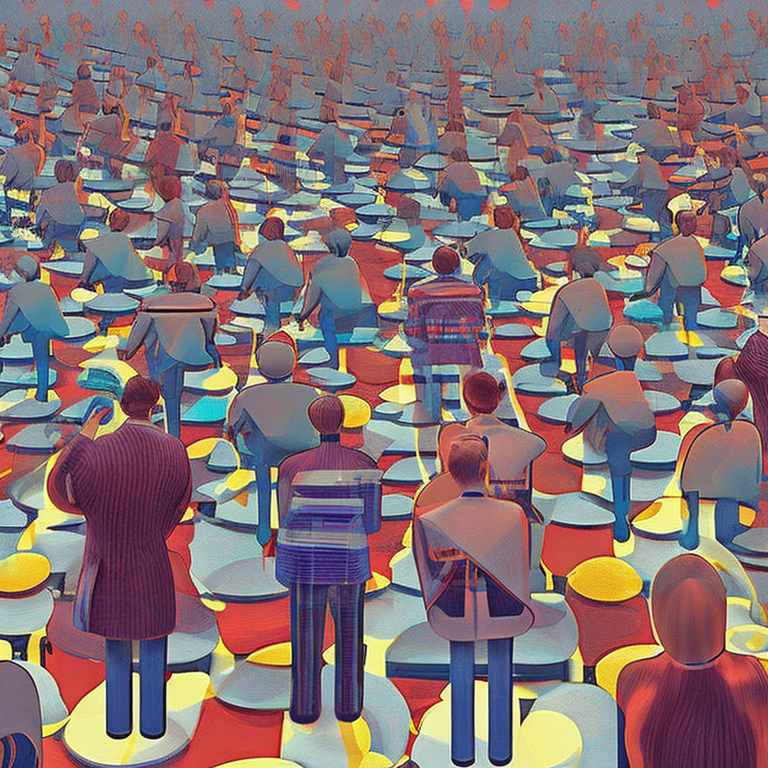

In [20]:
#Image Generations
image_gen=DiffusionPipeline.from_pretrained('stabilityai/stable-diffusion-2',
                                            torch_dtype=torch.float16,
                                            use_safetensors=True,
                                            variant='fp16').to('cuda')
text='A class of data scientist Learning about AI, in the surreal style of Salvador Dalian'
image=image_gen(text).images[0]
image

In [27]:
# Initialize the TTS pipeline
synthesiser = pipeline('text-to-speech', model='microsoft/speecht5_tts', device='cuda')

# Load the speaker embeddings dataset
embedding_dataset = load_dataset('Matthijs/cmu-arctic-xvectors', split='validation')

# Extract and process the speaker embedding
speaker_embeddings = torch.tensor(embedding_dataset[7306]['xvector']).unsqueeze(0)

# Generate speech with speaker embeddings
speech = synthesiser(
    "Hi to an artificial intelligence, on the way to mastery",
    forward_params={"speaker_embeddings": speaker_embeddings}
)

# Save the generated audio to a file
sf.write('speech.wav', speech['audio'], samplerate=speech['sampling_rate'])
Audio('speech.wav')